# 利用Pandas处理时序数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. 时间索引

### 1.1 Python时间数据的基本操作

In [2]:
from datetime import datetime

cur_year = 2018
cur_month = 9
cur_day = 27
cur_hour = 11
cur_min = 11
cur_sec = 15

In [7]:
cur_date = datetime(cur_year, cur_month, cur_day)
cur_date

datetime.datetime(2018, 9, 27, 0, 0)

In [6]:
cur_date_time = datetime(cur_year, cur_month, cur_day, cur_hour, cur_min, cur_sec)
cur_date_time

datetime.datetime(2018, 9, 27, 11, 11, 15)

In [8]:
type(cur_date_time)

datetime.datetime

In [9]:
cur_date_time.month

9

In [17]:
now = datetime.now()
print(now)
print('{}年{}月{}日'.format(now.year, now.month, now.day))

2018-09-27 11:56:07.142334
2018年9月27日


In [18]:
diff = datetime.now() - datetime(2018, 1, 1)
print(type(diff))
print(diff)
print('经历了{}天, {}秒。'.format(diff.days, diff.seconds))

<class 'datetime.timedelta'>
269 days, 11:56:31.067727
经历了269天, 42991秒。


### 1.2 字符串和datetime转换

In [19]:
# str()
dt_obj = datetime.now()
str_obj = str(dt_obj)
print(type(str_obj))
print(str_obj)

<class 'str'>
2018-09-27 11:58:11.531772


In [20]:
# datetime.strftime()
str_obj2 = dt_obj.strftime('%d/%m/%Y')
print(str_obj2)

27/09/2018


In [21]:
# strptime
dt_str = '2018-01-1'
dt_obj2 = datetime.strptime(dt_str, '%Y-%m-%d')
print(type(dt_obj2))
print(dt_obj2)

<class 'datetime.datetime'>
2018-01-01 00:00:00


### 1.3 Pandas时间索引操作

In [12]:
date_list = [datetime(2018, 9, 1), datetime(2018, 9, 2), datetime(2018, 9, 3) ]
dt_idx = pd.DatetimeIndex(date_list)
dt_idx

DatetimeIndex(['2018-09-01', '2018-09-02', '2018-09-03'], dtype='datetime64[ns]', freq=None)

In [13]:
data = np.random.rand(3, 2)
df = pd.DataFrame(data, index=dt_idx, columns=['a', 'b'])
df

a         b
2018-09-01  0.593855  0.318946
2018-09-02  0.935069  0.501579
2018-09-03  0.330332  0.081816

In [22]:
# 传入开始、结束日期，默认生成的该时间段的时间点是按天计算的
date_index = pd.date_range('2018/01/01', '2018/01/10')
print(date_index)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10'],
              dtype='datetime64[ns]', freq='D')


In [24]:
# 只传入开始或结束日期，还需要传入时间段
print(pd.date_range(start='2018/01/01', periods=10, freq='4D'))

DatetimeIndex(['2018-01-01', '2018-01-05', '2018-01-09', '2018-01-13',
               '2018-01-17', '2018-01-21', '2018-01-25', '2018-01-29',
               '2018-02-02', '2018-02-06'],
              dtype='datetime64[ns]', freq='4D')


In [25]:
print(pd.date_range(end='2018/03/31', periods=10))

DatetimeIndex(['2018-03-22', '2018-03-23', '2018-03-24', '2018-03-25',
               '2018-03-26', '2018-03-27', '2018-03-28', '2018-03-29',
               '2018-03-30', '2018-03-31'],
              dtype='datetime64[ns]', freq='D')


## 2. 重采样

In [30]:
df = pd.read_csv('./btc_usdt_day_price.csv')

In [31]:
df.head()

datetime     open     high      low    close        vol  \
0  2017-10-10 16:00:00     1.00  4901.00     1.00  4901.00  19.260000   
1  2017-10-11 16:00:00  4901.00  4999.00  4790.00  4989.00   0.580096   
2  2017-10-12 16:00:00  4989.00  5922.00  4989.00  5741.70  20.739843   
3  2017-10-13 16:00:00  5741.70  5849.95  5473.77  5849.95  19.259580   
4  2017-10-14 16:00:00  5849.95  5849.95  5686.41  5848.00   8.658607   

     symbol  
0  BTC/USDT  
1  BTC/USDT  
2  BTC/USDT  
3  BTC/USDT  
4  BTC/USDT

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 7 columns):
datetime    353 non-null object
open        353 non-null float64
high        353 non-null float64
low         353 non-null float64
close       353 non-null float64
vol         353 non-null float64
symbol      353 non-null object
dtypes: float64(5), object(2)
memory usage: 19.4+ KB


In [33]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [34]:
df.head()

datetime     open     high      low    close        vol    symbol
0 2017-10-10 16:00:00     1.00  4901.00     1.00  4901.00  19.260000  BTC/USDT
1 2017-10-11 16:00:00  4901.00  4999.00  4790.00  4989.00   0.580096  BTC/USDT
2 2017-10-12 16:00:00  4989.00  5922.00  4989.00  5741.70  20.739843  BTC/USDT
3 2017-10-13 16:00:00  5741.70  5849.95  5473.77  5849.95  19.259580  BTC/USDT
4 2017-10-14 16:00:00  5849.95  5849.95  5686.41  5848.00   8.658607  BTC/USDT

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 7 columns):
datetime    353 non-null datetime64[ns]
open        353 non-null float64
high        353 non-null float64
low         353 non-null float64
close       353 non-null float64
vol         353 non-null float64
symbol      353 non-null object
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 19.4+ KB


In [36]:
df.set_index('datetime', inplace=True)

In [37]:
df.head()

open     high      low    close        vol    symbol
datetime                                                                    
2017-10-10 16:00:00     1.00  4901.00     1.00  4901.00  19.260000  BTC/USDT
2017-10-11 16:00:00  4901.00  4999.00  4790.00  4989.00   0.580096  BTC/USDT
2017-10-12 16:00:00  4989.00  5922.00  4989.00  5741.70  20.739843  BTC/USDT
2017-10-13 16:00:00  5741.70  5849.95  5473.77  5849.95  19.259580  BTC/USDT
2017-10-14 16:00:00  5849.95  5849.95  5686.41  5848.00   8.658607  BTC/USDT

In [38]:
df2 = pd.read_csv('./btc_usdt_day_price.csv', index_col='datetime', parse_dates=True)

In [39]:
df2.index

DatetimeIndex(['2017-10-10 16:00:00', '2017-10-11 16:00:00',
               '2017-10-12 16:00:00', '2017-10-13 16:00:00',
               '2017-10-14 16:00:00', '2017-10-15 16:00:00',
               '2017-10-16 16:00:00', '2017-10-17 16:00:00',
               '2017-10-18 16:00:00', '2017-10-19 16:00:00',
               ...
               '2018-09-17 16:00:00', '2018-09-18 16:00:00',
               '2018-09-19 16:00:00', '2018-09-20 16:00:00',
               '2018-09-21 16:00:00', '2018-09-22 16:00:00',
               '2018-09-23 16:00:00', '2018-09-24 16:00:00',
               '2018-09-25 16:00:00', '2018-09-26 16:00:00'],
              dtype='datetime64[ns]', name='datetime', length=353, freq=None)

In [47]:
df.resample(rule='A').mean()

open          high          low        close           vol
datetime                                                                     
2017-12-31  9730.795471  10361.618705  9193.040764  9889.569587   7660.869604
2018-12-31  8334.930526   8613.056722  7998.986097  8309.146409  38118.870166

In [48]:
df.resample(rule='Q').mean()

open          high          low         close  \
datetime                                                            
2017-12-31   9730.795471  10361.618705  9193.040764   9889.569587   
2018-03-31  10412.738981  10897.367798  9798.964249  10335.545503   
2018-06-30   7734.802413   7931.319060  7505.682956   7733.718638   
2018-09-30   6806.874717   6955.850124  6647.765347   6808.710155   

                     vol  
datetime                  
2017-12-31   7660.869604  
2018-03-31  51041.305827  
2018-06-30  30939.826391  
2018-09-30  32179.680829

In [49]:
def first_day(entry):
    return entry[0]

df.resample('A').apply(first_day)

open        high         low       close           vol  \
datetime                                                                   
2017-12-31      1.0000   4901.0000      1.0000   4901.0000     19.260000   
2018-12-31  13167.6301  13907.7498  12976.6766  13652.8499  23734.687134   

              symbol  
datetime              
2017-12-31  BTC/USDT  
2018-12-31  BTC/USDT

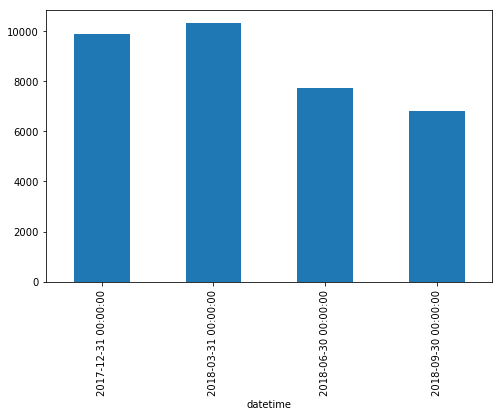

In [52]:
df['close'].resample('Q').mean().plot(kind='bar', figsize=(8, 5))

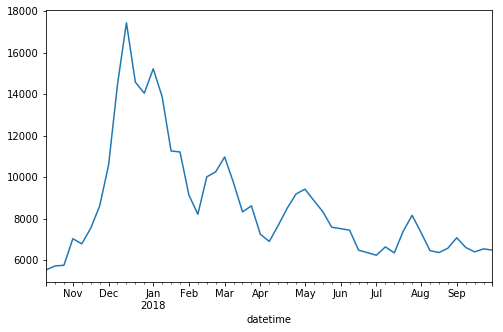

In [53]:
df['close'].resample('W').mean().plot(kind='line', figsize=(8, 5))

## 3.  平移操作

In [54]:
df.head()

open     high      low    close        vol    symbol
datetime                                                                    
2017-10-10 16:00:00     1.00  4901.00     1.00  4901.00  19.260000  BTC/USDT
2017-10-11 16:00:00  4901.00  4999.00  4790.00  4989.00   0.580096  BTC/USDT
2017-10-12 16:00:00  4989.00  5922.00  4989.00  5741.70  20.739843  BTC/USDT
2017-10-13 16:00:00  5741.70  5849.95  5473.77  5849.95  19.259580  BTC/USDT
2017-10-14 16:00:00  5849.95  5849.95  5686.41  5848.00   8.658607  BTC/USDT

In [56]:
df.shift(periods=1).head()

open     high      low    close        vol    symbol
datetime                                                                   
2017-10-10 16:00:00     NaN      NaN      NaN      NaN        NaN       NaN
2017-10-11 16:00:00     1.0  4901.00     1.00  4901.00  19.260000  BTC/USDT
2017-10-12 16:00:00  4901.0  4999.00  4790.00  4989.00   0.580096  BTC/USDT
2017-10-13 16:00:00  4989.0  5922.00  4989.00  5741.70  20.739843  BTC/USDT
2017-10-14 16:00:00  5741.7  5849.95  5473.77  5849.95  19.259580  BTC/USDT

In [57]:
df.shift(periods=-1).head()

open     high      low    close        vol    symbol
datetime                                                                    
2017-10-10 16:00:00  4901.00  4999.00  4790.00  4989.00   0.580096  BTC/USDT
2017-10-11 16:00:00  4989.00  5922.00  4989.00  5741.70  20.739843  BTC/USDT
2017-10-12 16:00:00  5741.70  5849.95  5473.77  5849.95  19.259580  BTC/USDT
2017-10-13 16:00:00  5849.95  5849.95  5686.41  5848.00   8.658607  BTC/USDT
2017-10-14 16:00:00  5848.00  5848.00  5848.00  5848.00   0.000000  BTC/USDT

In [63]:
df.tshift(freq='W').head()

open     high      low    close        vol    symbol
datetime                                                                    
2017-10-15 16:00:00     1.00  4901.00     1.00  4901.00  19.260000  BTC/USDT
2017-10-15 16:00:00  4901.00  4999.00  4790.00  4989.00   0.580096  BTC/USDT
2017-10-15 16:00:00  4989.00  5922.00  4989.00  5741.70  20.739843  BTC/USDT
2017-10-15 16:00:00  5741.70  5849.95  5473.77  5849.95  19.259580  BTC/USDT
2017-10-15 16:00:00  5849.95  5849.95  5686.41  5848.00   8.658607  BTC/USDT

## 4. 滚动统计

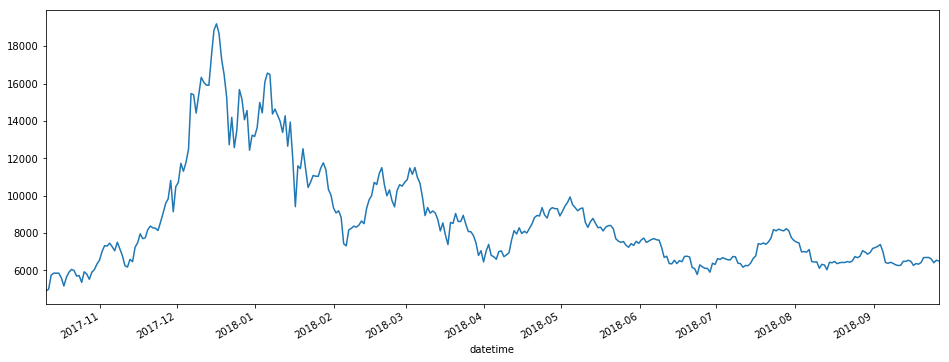

In [66]:
df['close'].plot(figsize=(16, 6))

In [67]:
df.rolling(window=7).mean().head(20)

open         high          low        close  \
datetime                                                                  
2017-10-10 16:00:00          NaN          NaN          NaN          NaN   
2017-10-11 16:00:00          NaN          NaN          NaN          NaN   
2017-10-12 16:00:00          NaN          NaN          NaN          NaN   
2017-10-13 16:00:00          NaN          NaN          NaN          NaN   
2017-10-14 16:00:00          NaN          NaN          NaN          NaN   
2017-10-15 16:00:00          NaN          NaN          NaN          NaN   
2017-10-16 16:00:00  4739.807143  5602.557143  4612.741429  5539.432857   
2017-10-17 16:00:00  5539.432857  5707.425714  5349.598571  5576.290000   
2017-10-18 16:00:00  5576.290000  5811.994286  5402.312857  5667.861429   
2017-10-19 16:00:00  5667.861429  5822.991429  5480.462857  5690.478571   
2017-10-20 16:00:00  5690.478571  5869.425714  5534.067143  5719.061429   
2017-10-21 16:00:00  5719.061429  5904.861429  5535.197143  5738.995714   
2017-10-22 16:00:00  5738.995714  5929.432857  5511.482857  5716.424286   
2017-10-23 16:00:00  5716.424286  5940.835714  5515.625714  5733.778571   
2017-10-24 16:00:00  5733.778571  5952.947143  5543.625714  5761.780000   
2017-10-25 16:00:00  5761.780000  5979.950000  5568.154286  5803.208571   
2017-10-26 16:00:00  5803.208571  5979.952857  5579.118571  5788.918571   
2017-10-27 16:00:00  5788.918571  5932.240000  5528.047143  5713.458571   
2017-10-28 16:00:00  5713.458571  5903.954286  5503.402857  5700.952857   
2017-10-29 16:00:00  5700.952857  5929.701429  5534.260000  5751.134286   

                           vol    symbol  
datetime                                  
2017-10-10 16:00:00        NaN  BTC/USDT  
2017-10-11 16:00:00        NaN  BTC/USDT  
2017-10-12 16:00:00        NaN  BTC/USDT  
2017-10-13 16:00:00        NaN  BTC/USDT  
2017-10-14 16:00:00        NaN  BTC/USDT  
2017-10-15 16:00:00        NaN  BTC/USDT  
2017-10-16 16:00:00  12.337174  BTC/USDT  
2017-10-17 16:00:00  11.115124  BTC/USDT  
2017-10-18 16:00:00  13.932539  BTC/USDT  
2017-10-19 16:00:00  16.158675  BTC/USDT  
2017-10-20 16:00:00  15.947671  BTC/USDT  
2017-10-21 16:00:00  20.619815  BTC/USDT  
2017-10-22 16:00:00  27.872219  BTC/USDT  
2017-10-23 16:00:00  28.189497  BTC/USDT  
2017-10-24 16:00:00  30.529988  BTC/USDT  
2017-10-25 16:00:00  34.986303  BTC/USDT  
2017-10-26 16:00:00  37.008488  BTC/USDT  
2017-10-27 16:00:00  46.655730  BTC/USDT  
2017-10-28 16:00:00  56.907432  BTC/USDT  
2017-10-29 16:00:00  84.154584  BTC/USDT

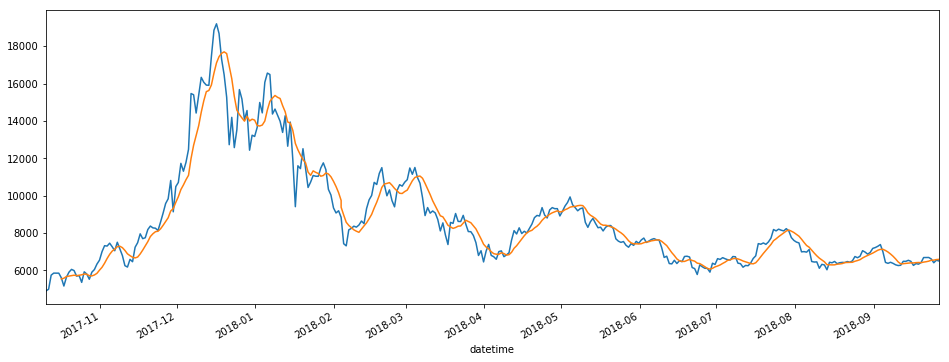

In [68]:
df['close'].plot()
df.rolling(window=7).mean()['close'].plot(figsize=(16, 6))

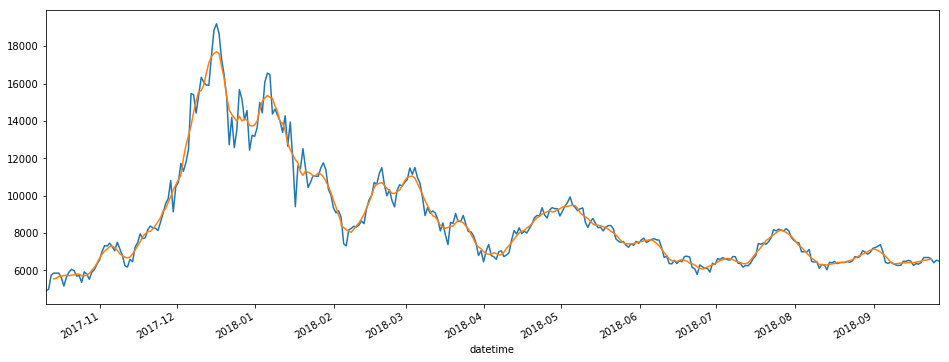

In [69]:
df['close'].plot()
df.rolling(window=7, center=True).mean()['close'].plot(figsize=(16, 6))

In [72]:
df['close_MA5'] = df['close'].rolling(window=5, center=True).mean()
df['close_MA10'] = df['close'].rolling(window=10, center=True).mean()
df['close_MA30'] = df['close'].rolling(window=30, center=True).mean()

In [73]:
df.head()

open     high      low    close        vol    symbol  \
datetime                                                                       
2017-10-10 16:00:00     1.00  4901.00     1.00  4901.00  19.260000  BTC/USDT   
2017-10-11 16:00:00  4901.00  4999.00  4790.00  4989.00   0.580096  BTC/USDT   
2017-10-12 16:00:00  4989.00  5922.00  4989.00  5741.70  20.739843  BTC/USDT   
2017-10-13 16:00:00  5741.70  5849.95  5473.77  5849.95  19.259580  BTC/USDT   
2017-10-14 16:00:00  5849.95  5849.95  5686.41  5848.00   8.658607  BTC/USDT   

                     close_MA5  close_MA10  close_MA30  
datetime                                                
2017-10-10 16:00:00        NaN         NaN         NaN  
2017-10-11 16:00:00        NaN         NaN         NaN  
2017-10-12 16:00:00   5465.930         NaN         NaN  
2017-10-13 16:00:00   5655.330         NaN         NaN  
2017-10-14 16:00:00   5777.206         NaN         NaN

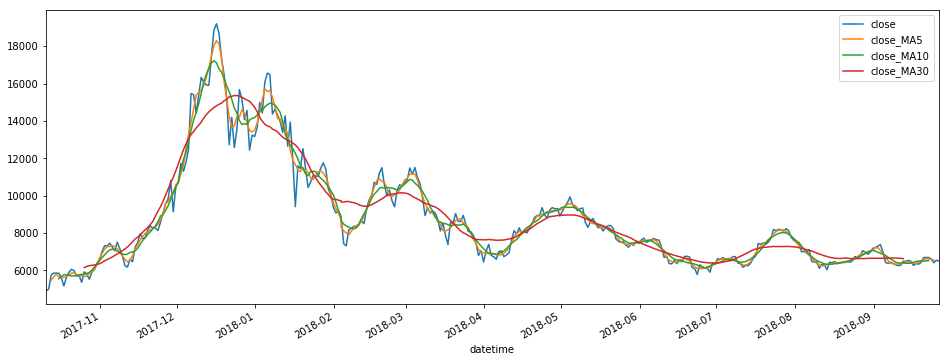

In [74]:
df[['close', 'close_MA5', 'close_MA10', 'close_MA30']].plot(figsize=(16, 6))